1. Import dependencies

In [1]:
import tensorflow
from keras.utils import np_utils
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, clone_model, Sequential
from tensorflow.keras.datasets import cifar10
from gc import callbacks
import matplotlib.pyplot as plt
import random
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import LearningRateScheduler
from sklearn.linear_model import LinearRegression



2.   Load data



In [2]:
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


3. Plot a few images 

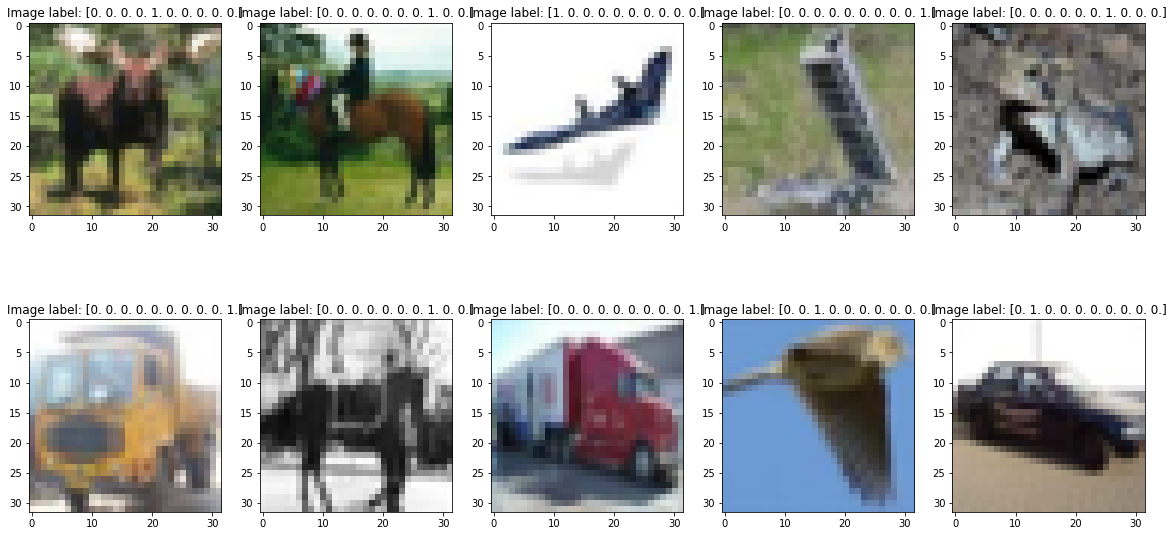

In [4]:
plt.figure(figsize=(20,10))
random_index= random.sample(range(0, 50000), 10)
for i, j in zip(random_index, range(10)):
    plt.subplot(2,5,j+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title('Image label: {}'.format(y_train[i]))
plt.show()

4. Normalize input

In [3]:
# Reduce pixel values
x_train, x_test = x_train / 255, x_test / 255

5. Define your model

In [4]:
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001,center=True, scale=True, beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros",
    moving_variance_initializer="ones",)(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001,center=True, scale=True, beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros",
    moving_variance_initializer="ones",)(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001,center=True, scale=True, beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros",
    moving_variance_initializer="ones",)(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001,center=True, scale=True, beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros",
    moving_variance_initializer="ones",)(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001,center=True, scale=True, beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros",
    moving_variance_initializer="ones",)(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001,center=True, scale=True, beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros",
    moving_variance_initializer="ones",)(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [7]:
# model description
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

7. Compile your model

In [5]:
#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='ADAM',metrics=['accuracy'])

8. Checkpoint

In [6]:
earlystpoing = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)

9. Fit your model

In [53]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    callbacks=[earlystpoing],
    epochs=50,
    validation_split=0.3
)

Epoch 1/50
274/274 [==============================] - 7s 20ms/step - loss: 1.6406 - accuracy: 0.4699 - val_loss: 3.1840 - val_accuracy: 0.1797
Epoch 2/50
274/274 [==============================] - 5s 18ms/step - loss: 0.9959 - accuracy: 0.6457 - val_loss: 1.2933 - val_accuracy: 0.5577
Epoch 3/50
274/274 [==============================] - 5s 18ms/step - loss: 0.7747 - accuracy: 0.7263 - val_loss: 0.7977 - val_accuracy: 0.7203
Epoch 4/50
274/274 [==============================] - 5s 18ms/step - loss: 0.6276 - accuracy: 0.7774 - val_loss: 0.8548 - val_accuracy: 0.7127
Epoch 5/50
274/274 [==============================] - 5s 18ms/step - loss: 0.5197 - accuracy: 0.8161 - val_loss: 0.7042 - val_accuracy: 0.7607
Epoch 6/50
274/274 [==============================] - 5s 19ms/step - loss: 0.4252 - accuracy: 0.8507 - val_loss: 0.7901 - val_accuracy: 0.7464
Epoch 7/50
274/274 [==============================] - 5s 18ms/step - loss: 0.3574 - accuracy: 0.8729 - val_loss: 0.7102 - val_accuracy: 0.7713

Evaluation

In [54]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.1990 - accuracy: 0.8086
Test loss: 1.1990489959716797
Test accuracy: 0.8086000084877014


10. Plot accuracy per epoch

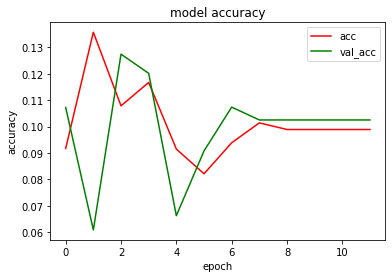

In [12]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


11. Data augmentation

In [8]:
batch_size = 32

data_generator = ImageDataGenerator(rotation_range=180,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
data_generator.fit(x_train)

train_generator = data_generator.flow(x_train, y_train, batch_size)
valid_generator = data_generator.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size

# create a copy of your model and train it with augmented data
history2=model.fit(train_generator,steps_per_epoch=len(x_train)//32,epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
1562/1562 [==============================] - 34s 21ms/step - loss: 1.8703 - accuracy: 0.3380 - val_loss: 1.7213 - val_accuracy: 0.3827
Epoch 2/50
1562/1562 [==============================] - 32s 21ms/step - loss: 1.5736 - accuracy: 0.4339 - val_loss: 1.6768 - val_accuracy: 0.4255
Epoch 3/50
1562/1562 [==============================] - 33s 21ms/step - loss: 1.4317 - accuracy: 0.4849 - val_loss: 1.6219 - val_accuracy: 0.4616
Epoch 4/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.3342 - accuracy: 0.5216 - val_loss: 1.3043 - val_accuracy: 0.5224
Epoch 5/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.2653 - accuracy: 0.5492 - val_loss: 1.3600 - val_accuracy: 0.5269
Epoch 6/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2080 - accuracy: 0.5746 - val_loss: 1.2686 - val_accuracy: 0.5681
Epoch 7/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.1610 - accuracy: 0.5915 - val_loss: 1.2266 -

In [9]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.7248 - accuracy: 0.7576
Test loss: 0.7248339056968689
Test accuracy: 0.7576000094413757


12. Plot accuracy per epoch

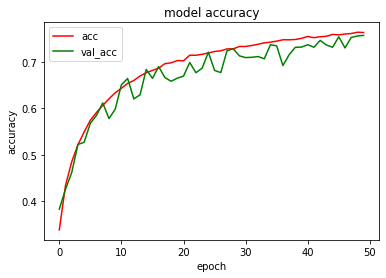

In [10]:
# Plot accuracy per iteration
plt.plot(history2.history['accuracy'], label='acc', color='red')
plt.plot(history2.history['val_accuracy'], label='val_acc', color='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

13. Save model

In [11]:
model.save('/content/model.h5')

changing learning rate after every 10 epoches 

In [12]:
def scheduler(epochs, lr):
  if epochs == 10 or epochs == 20 or epochs ==30 or epochs ==40 or epochs ==50:
     return lr/2
  else:
     return lr

callback = LearningRateScheduler(scheduler)
history = model.fit(x_train,y_train, epochs=50, callbacks=[callback])
round(model.optimizer.lr.numpy(), 5)

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4820 - accuracy: 0.8329 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3422 - accuracy: 0.8817 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2604 - accuracy: 0.9090 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2023 - accuracy: 0.9281 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1629 - accuracy: 0.9440 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1345 - accuracy: 0.9523 - lr: 0.0010
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1153 - accuracy: 0.9603 - lr: 0.0010
Epoch 8/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1037 - accuracy: 0.9649 - lr: 0.0010
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - l

6e-05

In [13]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.8536 - accuracy: 0.8851
Test loss: 0.8535692095756531
Test accuracy: 0.8851000070571899


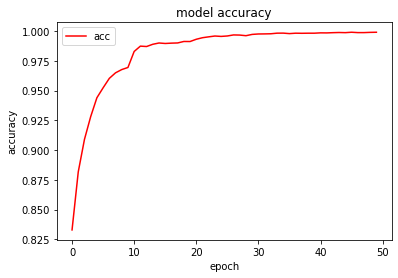

In [14]:
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

14. Predict results

In [15]:
predictions = model.predict(x_test)
print(predictions.shape)

(10000, 10)


15. Plot images with actual vs predicted labels



actual prob of classes
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
predicted prob of classes
[6.8480458e-19 2.0659863e-17 9.2289587e-13 9.9930203e-01 1.6766580e-17
 6.9790974e-04 4.3954535e-17 4.5102146e-13 3.1023591e-17 1.8811909e-14]


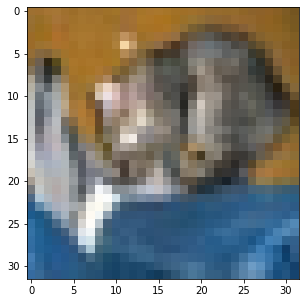

In [17]:
plt.figure(figsize = (5,5))
plt.imshow(x_test[0])
print('actual prob of classes')
print(y_test[0])
print('predicted prob of classes')
print(predictions[0])
